# Support Vector Machine

In [1]:
import some_load_train_evaluate_functions as ml

from sklearn.neighbors import KNeighborsClassifier

In [2]:
path = '../KG/db.env'

driver = ml.connect_to_neo4j(path)

Connected to database successfully.


### Load Data

In [3]:
# Diabetes data

diabetes_df = ml.get_data_of_disease(driver, 'Diabetes')
diabetes_df

,Respondent_ID,Gender,Age,BMI,25-hydroxyvitamin D2 + D3 [nmol/L],A/G Ratio,Alpha-carotene [umol/L],Alpha-crypotoxanthin [umol/L],Alpha-tocopherol [umol/L],Basophils [%],...,Ferritin [ng/mL],Gamma Glutamyl Transferase [IU/L],Hemoglobin [g/dL],Insulin [pmol/L],LDL-Cholesterol(NIH2) [mmol/L],Lactate Dehydrogenase [IU/L],Transferrin Saturation [%],Transferrin receptor [nmol/L],Triglyceride [mmol/L],Diabetes
0,93703,0,2,17.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,93704,1,2,15.7,74.4,NaN,NaN,NaN,NaN,0.7,...,36.60,NaN,13.1,NaN,NaN,NaN,NaN,30.6,NaN,0
2,93705,0,66,31.7,89.9,1.517241,0.138,0.071,26.006,1.0,...,28.70,21.0,11.9,NaN,NaN,174.0,28.0,39.8,NaN,0
3,93706,1,18,21.5,53.8,1.629630,0.160,0.031,16.765,0.8,...,284.00,16.0,16.3,NaN,NaN,142.0,51.0,34.0,NaN,0
4,93707,1,13,18.1,58.2,1.857143,0.009,0.044,22.756,0.5,...,49.30,9.0,14.5,NaN,NaN,177.0,21.0,34.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8888,102952,0,70,20.0,82.7,1.846154,0.235,0.077,31.347,0.6,...,135.00,18.0,13.4,26.34,1.112,168.0,39.0,29.1,0.881,1
8889,102953,1,42,35.8,49.5,1.142857,0.106,0.080,21.873,0.6,...,120.00,28.0,15.5,NaN,NaN,136.0,20.0,28.6,NaN,0
8890,102954,0,41,26.1,50.5,1.500000,0.117,0.056,26.935,1.4,...,1.99,8.0,6.4,56.94,2.793,123.0,5.0,248.0,0.553,0
8891,102955,0,14,45.6,61.9,1.205882,0.031,0.079,17.856,0.9,...,11.40,16.0,11.4,NaN,NaN,158.0,5.0,57.7,NaN,0


### Training

In [4]:
knn_classifier = KNeighborsClassifier()

# Attributes and Labels

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

# Training

knn_classifier.fit(X_train, y_train)

# Accuracy scores

y_pred = knn_classifier.predict(X_val)

print('Training Accuracy: ',ml.accuracy_score(y_train, knn_classifier.predict(X_train)))

print('Testing Accuracy: ',ml.accuracy_score(y_val, y_pred))

Training Accuracy:  0.9093337081810514
Testing Accuracy:  0.9089120044981727


## Feature Selection

### Correlation Analysis

In [5]:
knn_classifier_test = KNeighborsClassifier()

In [6]:
pos_corr, neg_corr = ml.get_correlated_features(diabetes_df,'Diabetes',pos=0.1,neg=-0.1)

corr_features = ['Gender'] + list(pos_corr.keys()[1:10]) + list(neg_corr.keys()[:10])
corr_features

['Gender',
 'Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Age',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Insulin [pmol/L]',
 'Osmolality [mmol/Kg]',
 'Retinol [umol/L]',
 'Triglyceride [mmol/L]',
 'Total Lycopene [umol/L]',
 'Trans-lycopene [umol/L]',
 'Platelet count [1000 cells/uL]',
 'A/G Ratio',
 'Chloride [mmol/L]',
 'Platelet_WBC Ratio',
 'Direct HDL-Cholesterol [mmol/L]',
 'Albumin [g/dL]',
 'Alpha-crypotoxanthin [umol/L]',
 'Lymphocyte_C-Reactive Protein Ratio']

In [7]:
ml.evaluate_feature_set(corr_features, knn_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.929

Test Accuracy: 0.928

Precision: 0.873

Recall: 0.554

F1-Score: 0.678


### SelectFromModel

In [8]:
sfm_features = ml.select_from_model_features(ml.LogisticRegression(),X,y)
sfm_features

['Age',
 'BMI',
 'Fasting Glucose [mmol/L]',
 'Glycohemoglobin [%]',
 'Hematocrit [%]',
 'Mean Cell Hgb Conc. [g/dL]',
 'Mean cell hemoglobin [pg]',
 'Mean cell volume [fL]',
 'Non_HDL Ratio',
 'Osmolality [mmol/Kg]',
 'RBC count [million cells/uL]',
 'Retinol [umol/L]',
 'Retinyl palmitate [umol/L]',
 'Sodium [mmol/L]',
 'Total Cholesterol [mmol/L]',
 'Total Cholestrol_HDL Ratio',
 'Triglyceride_HDL Ratio',
 'Vitamin C [umol/L]',
 'White blood cell count [1000 cells/uL]',
 'Alkaline Phosphatase [IU/L]',
 'Gamma Glutamyl Transferase [IU/L]',
 'Hemoglobin [g/dL]',
 'Insulin [pmol/L]',
 'Transferrin receptor [nmol/L]']

In [9]:
sfm_features = list(sfm_features)

ml.evaluate_feature_set(sfm_features, knn_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.932

Test Accuracy: 0.934

Precision: 0.917

Recall: 0.568

F1-Score: 0.702


### SelectKBest

In [10]:
k_best_features = ml.select_k_best(X, y, n=30)
k_best_features[:30]

['Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Age',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Osmolality [mmol/Kg]',
 'Retinol [umol/L]',
 'Lymphocyte [%]',
 'Insulin [pmol/L]',
 'Alpha-tocopherol [umol/L]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'Segmented neutrophils [%]',
 'Neutrophil_Lymphocyte Ratio',
 'Alpha-crypotoxanthin [umol/L]',
 'Albumin [g/dL]',
 'Direct HDL-Cholesterol [mmol/L]',
 'Platelet_WBC Ratio',
 'C-Reactive Protein [mg/L]',
 'Creatinine [mg/dL]',
 'Ferritin [ng/mL]',
 'Chloride [mmol/L]',
 'Red cell distribution width [%]',
 'Triglyceride [mmol/L]',
 'A/G Ratio',
 'Platelet count [1000 cells/uL]',
 'Triglyceride_HDL Ratio',
 'Trans-lycopene [umol/L]',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Total Lycopene [umol/L]',
 'Mean platelet volume [fL]']

In [11]:
ml.evaluate_feature_set(k_best_features[:30], knn_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.927

Test Accuracy: 0.924

Precision: 0.903

Recall: 0.498

F1-Score: 0.642


### Recursive Feature Elimination (RFE) 

In [12]:
rfe_features = ml.select_rfe_features(ml.LogisticRegression(),X,y,n=30,step=0.5)
rfe_features[:30]

['Triglyceride [mmol/L]',
 'Glycohemoglobin [%]',
 'Hematocrit [%]',
 'Iron [ug/dL]',
 'Vitamin C [umol/L]',
 'Triglyceride_HDL Ratio',
 'Mean Cell Hgb Conc. [g/dL]',
 'Mean cell hemoglobin [pg]',
 'Mean cell volume [fL]',
 'Albumin [g/dL]',
 'Non_HDL Ratio',
 'Osmolality [mmol/Kg]',
 'Transferrin receptor [nmol/L]',
 'Total Cholestrol_HDL Ratio',
 'Total Cholesterol [mmol/L]',
 'RBC count [million cells/uL]',
 'Retinol [umol/L]',
 'Retinyl palmitate [umol/L]',
 'Retinyl stearate [umol/L]',
 'Total Lycopene [umol/L]',
 'Fasting Glucose [mmol/L]',
 'White blood cell count [1000 cells/uL]',
 'Sodium [mmol/L]',
 'Age',
 'BMI',
 'A/G Ratio',
 'Insulin [pmol/L]',
 'Hemoglobin [g/dL]',
 'Gamma Glutamyl Transferase [IU/L]',
 'Alkaline Phosphatase [IU/L]']

In [13]:
ml.evaluate_feature_set(rfe_features[:30], knn_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.927

Test Accuracy: 0.928

Precision: 0.913

Recall: 0.521

F1-Score: 0.663


### Lasso Regularization

In [14]:
l1_selected_features = ml.log_reg_lasso_select(X_train, y_train)
l1_selected_features[:30]

['Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Age',
 'Gender',
 'BMI',
 'Retinol [umol/L]',
 'Total Cholesterol [mmol/L]',
 'Alkaline Phosphatase [IU/L]',
 'Non_HDL Ratio',
 'Insulin [pmol/L]',
 'Osmolality [mmol/Kg]',
 'Vitamin C [umol/L]',
 'Blood lead [umol/L]',
 'Transferrin receptor [nmol/L]',
 'Gamma Glutamyl Transferase [IU/L]',
 'Mean Cell Hgb Conc. [g/dL]',
 'Transferrin Saturation [%]',
 'Aspartate Aminotransferase [U/L]',
 'Creatine Phosphokinase [IU/L]',
 'LDL-Cholesterol(NIH2) [mmol/L]',
 'Lactate Dehydrogenase [IU/L]',
 'White blood cell count [1000 cells/uL]',
 'Creatinine [mg/dL]',
 'Total Cholestrol_HDL Ratio',
 'Platelet_Lymphocyte Ratio',
 'Retinyl palmitate [umol/L]',
 'Uric Acid [mg/dL]',
 'Sodium [mmol/L]',
 'Bicarbonate [mmol/L]',
 'Direct HDL-Cholesterol [mmol/L]']

In [15]:
ml.evaluate_feature_set(l1_selected_features[:30], knn_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.930

Test Accuracy: 0.929

Precision: 0.886

Recall: 0.545

F1-Score: 0.675


### Relief F

In [16]:
relieff_features = ml.relief_feature_select(30,X,y)

In [17]:
relieff_features[:30]

['Age',
 'Glycohemoglobin [%]',
 'BMI',
 'Segmented neutrophils [%]',
 'Hematocrit [%]',
 'Lymphocyte [%]',
 'Hemoglobin [g/dL]',
 'Fasting Glucose [mmol/L]',
 'Retinol [umol/L]',
 'Total Cholesterol [mmol/L]',
 'Non_HDL Ratio',
 'Neutrophil_Lymphocyte Ratio',
 'Alpha-tocopherol [umol/L]',
 'Osmolality [mmol/Kg]',
 'Mean cell volume [fL]',
 'Sodium [mmol/L]',
 'Total Cholestrol_HDL Ratio',
 'Total Iron Binding Capacity [umol/L]',
 'Blood Urea Nitrogen [mg/dL]',
 'Chloride [mmol/L]',
 'Mean cell hemoglobin [pg]',
 'RBC count [million cells/uL]',
 'Total Protein [g/dL]',
 'Total Calcium [mg/dL]',
 'A/G Ratio',
 'Potassium [mmol/L]',
 'Uric Acid [mg/dL]',
 'Lactate Dehydrogenase [IU/L]',
 'Transferrin Saturation [%]',
 'Mean platelet volume [fL]']

In [18]:
ml.evaluate_feature_set(relieff_features[:30], knn_classifier_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.909

Test Accuracy: 0.909

Precision: 0.848

Recall: 0.403

F1-Score: 0.546


### Optimal no. of features


Maximum accuracy = 0.9319 for 5 features


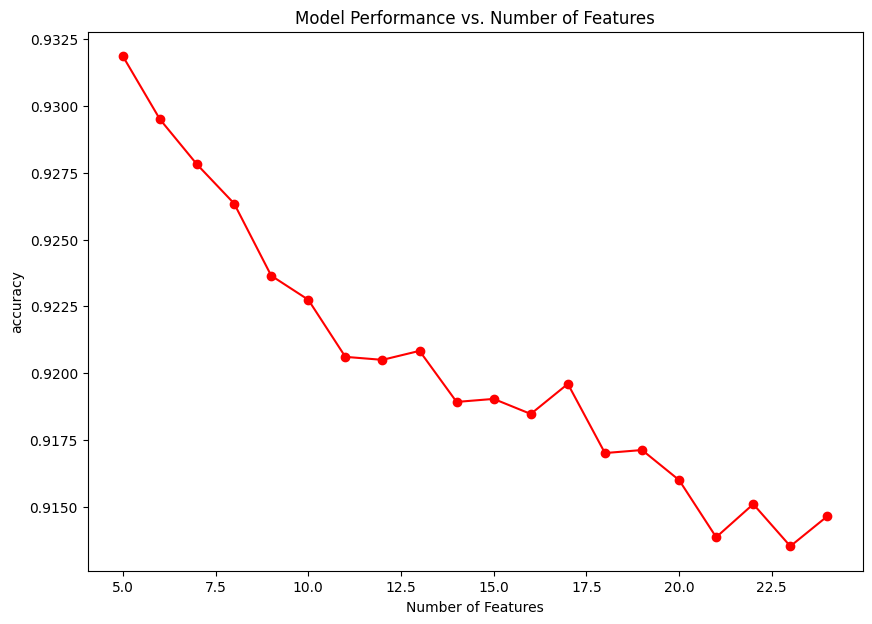

In [19]:
# Optimal no. of features

final_features = list(sfm_features) 

ml.plot_num_feature_performance(knn_classifier_test,  X, y, final_features, scoring='accuracy')


Maximum f1 = 0.7069 for 5 features


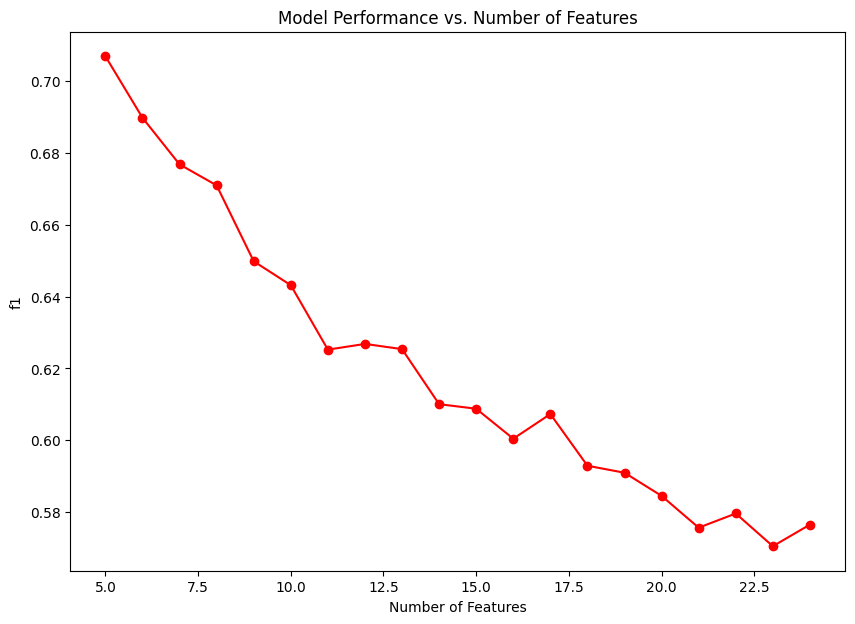

In [20]:
# Optimal no. of features

ml.plot_num_feature_performance(knn_classifier_test,  X, y, final_features, scoring='f1')


Maximum recall = 0.6260 for 5 features


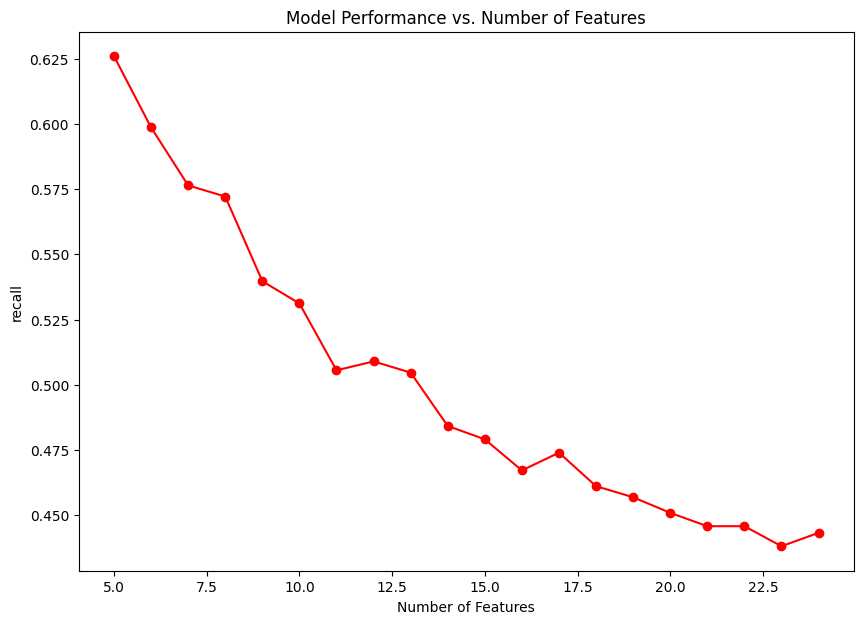

In [21]:
# Optimal no. of features

ml.plot_num_feature_performance(knn_classifier_test,  X, y, final_features, scoring='recall')

In [22]:
num_features = 5

selected = final_features[:num_features]
selected.append('Diabetes')

diabetes_df = diabetes_df[selected]

## Preprocessing

### Zero Imputation

In [23]:
# Imputing null values with zeroes

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                        impute = True, scale=True,
                                                        imputer=ml.SimpleImputer(strategy='constant',fill_value=0),
                                                        random_state=42)

In [24]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.942

Test Accuracy: 0.939

Precision: 0.868

Recall: 0.653

F1-Score: 0.745


### Mode Imputation

In [25]:
# Imputing with most frequent values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='most_frequent'),
                                                              random_state=42)

In [26]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.944

Test Accuracy: 0.939

Precision: 0.826

Recall: 0.696

F1-Score: 0.756


### k-NN Imputation

In [27]:
# Imputing missing values with values from the k-nearest neighbors in the feature space

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.KNNImputer(n_neighbors=20),
                                                              random_state=42)

In [28]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.944

Test Accuracy: 0.942

Precision: 0.877

Recall: 0.665

F1-Score: 0.757


### Multiple Imputation by Chained Equations (MICE)

In [29]:
# Imputes by looking at data from other columns and trying to estimate the best prediction for each missing value.

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.IterativeImputer(max_iter=20),
                                                              random_state=42)

In [30]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.943

Test Accuracy: 0.940

Precision: 0.860

Recall: 0.671

F1-Score: 0.754


### Median Imputation

In [31]:
# Imputing with median values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='median'),
                                                              random_state=42)

In [32]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.944

Test Accuracy: 0.939

Precision: 0.823

Recall: 0.702

F1-Score: 0.758


### Mean Imputation

In [33]:
# Splitting and Preprocessing data

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

In [34]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.948

Test Accuracy: 0.945

Precision: 0.877

Recall: 0.692

F1-Score: 0.774


### Dropping Null Values

In [35]:
# Drop null values
diabetes_df_na = diabetes_df.dropna()

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df_na, label = 'Diabetes',
                                                              impute = False, scale=True,
                                                              random_state=42)

In [36]:
knn_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(knn_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.938

Test Accuracy: 0.936

Precision: 0.974

Recall: 0.698

F1-Score: 0.813


## Oversampling and Undersampling

### Random Oversampling

In [37]:
X_ros, y_ros = ml.random_over_sample(X_train, y_train)

knn_classifier.fit(X_ros, y_ros)

ml.evaluate_model_metrics(knn_classifier,X_ros, y_ros,X_val, y_val)


Train Accuracy: 0.953

Test Accuracy: 0.939

Precision: 0.784

Recall: 0.958

F1-Score: 0.862


### SMOTE (Synthetic Minority Over-sampling Technique)

In [38]:
X_smote, y_smote = ml.smote_over_sample(X_train, y_train)

knn_classifier.fit(X_smote, y_smote)

ml.evaluate_model_metrics(knn_classifier,X_smote, y_smote,X_val, y_val)


Train Accuracy: 0.957

Test Accuracy: 0.951

Precision: 0.820

Recall: 0.967

F1-Score: 0.887


### Random Undersampling

In [39]:
X_rus, y_rus = ml.random_under_sample(X_train, y_train)

knn_classifier.fit(X_rus, y_rus)

ml.evaluate_model_metrics(knn_classifier,X_rus, y_rus,X_val, y_val)


Train Accuracy: 0.898

Test Accuracy: 0.908

Precision: 0.734

Recall: 0.844

F1-Score: 0.785


### Tomek Links

In [40]:
X_tomek, y_tomek = ml.tomek_links(X_train, y_train)

knn_classifier.fit(X_tomek, y_tomek)

ml.evaluate_model_metrics(knn_classifier,X_tomek, y_tomek,X_val, y_val)


Train Accuracy: 0.940

Test Accuracy: 0.939

Precision: 0.962

Recall: 0.722

F1-Score: 0.825


### SMOTE + Tomek Links

In [41]:
X_smote_tomek, y_smote_tomek = ml.smote_tomek(X_train, y_train)

knn_classifier.fit(X_smote_tomek, y_smote_tomek)

ml.evaluate_model_metrics(knn_classifier,X_smote_tomek, y_smote_tomek,X_val, y_val)


Train Accuracy: 0.963

Test Accuracy: 0.946

Precision: 0.804

Recall: 0.967

F1-Score: 0.878


In [42]:
# Model seems to perform with SMOTE

X_train, y_train = X_smote, y_smote

## Hyperparameter Optimization 

### Grid Search

In [43]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

In [44]:
grid_best_params, knn_classifier_grid = ml.grid_search_optimize(knn_classifier, param_grid, X_train, 
                                                                y_train, cv=10,scoring='accuracy')

In [45]:
grid_best_params

{'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

### Random Search

In [46]:
rand_best_params, knn_classifier_rand = ml.random_search_optimize(knn_classifier,param_grid,n_iter=100,cv=5,
                                                               X_train=X_train, y_train=y_train,
                                                               scoring='accuracy')

In [47]:
rand_best_params

{'weights': 'distance', 'p': 1, 'n_neighbors': 3, 'algorithm': 'auto'}

### Optuna

In [48]:
def objective(trial):

    n_neighbors = trial.suggest_int('n_neighbors', 3, 15)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
    p = trial.suggest_int('p', 1, 2)
    
    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, p=p)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = ml.accuracy_score(y_test, y_pred)

    return accuracy

In [49]:
best_trial , knn_classifier_opt = ml.optuna_optimize(objective, KNeighborsClassifier, n_trials=150)

In [50]:
best_trial

{'n_neighbors': 4, 'weights': 'distance', 'algorithm': 'kd_tree', 'p': 2}

## Evaluation on Test Set


Train Accuracy: 0.873

Test Accuracy: 0.942

Precision: 0.946

Recall: 0.749

F1-Score: 0.836

Confusion Matrix:

[[844   9]
 [ 53 158]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.94      0.99      0.96       853
     Class 1       0.95      0.75      0.84       211

    accuracy                           0.94      1064
   macro avg       0.94      0.87      0.90      1064
weighted avg       0.94      0.94      0.94      1064


ROC-AUC Curve:


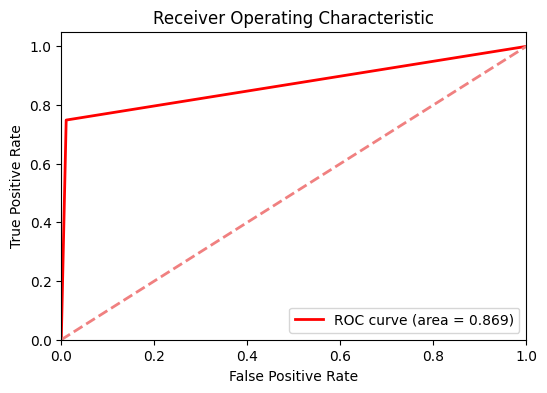

In [59]:
# After evaluating on the validation set, we evaluate and finalize on the test set

ml.evaluate_model_metrics(knn_classifier, X_train, y_train, X_test, y_test, verbose=6)

## Cross Validation

### K-fold

In [51]:
ml.k_cross_validate(knn_classifier,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.93632959 0.93233083 0.91729323 0.90225564 0.91353383 0.91353383
 0.93233083 0.95112782 0.90977444 0.92481203]

Mean accuracy score:  0.9233322069217988

Standard deviation:  0.014007813781088957


In [52]:
ml.k_cross_validate(knn_classifier_grid,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.92134831 0.93609023 0.91729323 0.89097744 0.90977444 0.92481203
 0.93233083 0.95112782 0.90601504 0.90977444]

Mean accuracy score:  0.9199543803328547

Standard deviation:  0.01630698449614705


In [53]:
ml.k_cross_validate(knn_classifier_rand,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.92134831 0.93609023 0.91729323 0.89097744 0.90977444 0.92481203
 0.93233083 0.95112782 0.90601504 0.90977444]

Mean accuracy score:  0.9199543803328547

Standard deviation:  0.01630698449614705


In [54]:
ml.k_cross_validate(knn_classifier_opt,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.93258427 0.93609023 0.91729323 0.88721805 0.91353383 0.91353383
 0.93233083 0.92105263 0.91353383 0.90225564]

Mean accuracy score:  0.916942637492608

Standard deviation:  0.014139382089439071


### Stratified K-fold

In [55]:
ml.stratified_k_cross_validate(knn_classifier,X,y,n_splits=10)


Average Accuracy: 0.9225901833234772

Average Precision: 0.9265741362204777

Average Recall: 0.6863311688311688

Average F1-Score: 0.7866828125390766


In [56]:
ml.stratified_k_cross_validate(knn_classifier_grid,X,y,n_splits=10)


Average Accuracy: 0.9162020219087044

Average Precision: 0.8625295020567586

Average Recall: 0.7167207792207793

Average F1-Score: 0.7816758705163366


In [57]:
ml.stratified_k_cross_validate(knn_classifier_rand,X,y,n_splits=10)


Average Accuracy: 0.9162020219087044

Average Precision: 0.8625295020567586

Average Recall: 0.7167207792207793

Average F1-Score: 0.7816758705163366


In [58]:
ml.stratified_k_cross_validate(knn_classifier_opt,X,y,n_splits=10)


Average Accuracy: 0.9207076680465208

Average Precision: 0.8922058761511759

Average Recall: 0.707857142857143

Average F1-Score: 0.787960321445633


### Save Model

In [62]:
final_svm_estimator = knn_classifier

In [63]:
# Saving the model

ml.save_model(final_svm_estimator, "../Models/Diabetes/SVM.pkl")

Overwrite File? [y/n]: y
Saved Model


## Prediction

In [64]:
# Predicting on perturbed values

ml.predict_on_modified_instance(final_svm_estimator, X_test.iloc[0], y_test.iloc[0], 0.4)

Instance:
 [ 0.65457083  0.17074648 -0.12432438 -0.06821877  0.94367518]

Expected Class:  1

 Modified Instance:
 [ 0.65457083  0.00434762 -0.26288436 -0.28046963  0.94398922]

Predicted Class:  [0]


In [65]:
ml.predict_on_modified_instance(final_svm_estimator, X_test.iloc[1], y_test.iloc[1], 0.3)

Instance:
 [ 0.46075885 -1.14582998 -0.46450925 -0.63454988 -0.54661411]

Expected Class:  0

 Modified Instance:
 [ 0.46075885 -1.01956911 -0.27849238 -0.52447927 -0.87705466]

Predicted Class:  [0]


In [72]:
ml.predict_on_modified_instance(final_svm_estimator, X_test.iloc[2], y_test.iloc[2], 0.35)

Instance:
 [-0.1691301   0.29043525  6.65906354  7.67163978  2.12148446]

Expected Class:  1

 Modified Instance:
 [-0.1691301   0.25071009  6.4715649   7.52887397  2.2256307 ]

Predicted Class:  [1]
